In [1]:
import os
import time
import numpy as np
import random
import math
import cplex
from SSLTL import productMDP_fromLTL,build_induced_MDP,print_productMDP_vars,build_induced_MC,buildgrid,getstates
from SSLTL_DeterministicLP_lib import qcpex1,qcpex1_new
import spot
from statistics import mean, stdev
import cplex

ltl2drafolder = '/home/user/rabinizer4/bin'
SPOTbinfolder = '/home/user/spot-2.9/bin'
HOAfile = '/tmp/test.hoa'

from SSLTLplot import makedotMDP,makedotMC
from IPython.display import display # not needed with recent Jupyter

# Setup spot for fancy plots (it appears this is only recommended if the display command is run)
spot.setup()

# print('Current PYTHONPATH: {0}'.format(os.environ['PYTHONPATH']))

In [2]:
# Pending - need to include rewards
R_sas = {}

SSconstraints = []

# ## SIMPLE EXAMPLE 1
# LTLstr = 'G F c'
# gridtype = '2x2'
# labelstr = (
# "aa"
# "ac"
# )

# # SIMPLE EXAMPLE 2
# LTLstr = 'G (F (c & X c))'
# gridtype = '2x2'
# labelstr = (
# "aa"
# "ac"
# )


# SIMPLE EXAMPLE 2 - CAV Example for MC original MDP
LTLstr = 'G (F (a & X c))'
gridtype = '2x2'
labelstr = (
"aa"
"ac"
)
SSconstraints = [([3], 'G', 0.1)]


# # SIMPLE EXAMPLE 3A
# LTLstr = 'GF(b & Xc & XXd)' # clockwise
# gridtype = '2x2'
# labelstr = (
# "ab"
# "dc"
# )

# # SIMPLE EXAMPLE 3B
# LTLstr = 'GF(d & Xc & XXb)' # counter-clockwise
# gridtype = '2x2'
# labelstr = (
# "ab"
# "dc"
# )

## SIMPLE EXAMPLE 3C
# LTLstr = 'GF(b & Xd & XXc)' # infeasible
# gridtype = '2x2'
# labelstr = (
# "ab"
# "dc"
# )

# #Full example 1A: without steady-state constraints
# LTLstr = 'GF(c & Xc)'
# gridtype = '8x8'
# labelstr = (
# "aaaaaaaa"
# "abbccbba"
# "abbccbba"
# "acccccca"
# "acccccca"
# "abbccbba"
# "abbccbba"
# "aaaaaaaa"
# )

# # Full example 1B: with steady-state constraints
# LTLstr = 'GF(c & Xc)'
# gridtype = '8x8'
# labelstr = (
# "aaaaaaaa"
# "abbccbba"
# "abbccbba"
# "acccccca"
# "acccccca"
# "abbccbba"
# "abbccbba"
# "aaaaaaaa"
# )
# SSconstraints = [([25], 'G', 0.1)]

# # Full example 1C: complicated
# LTLstr = 'GF(a & Xb & XXc & XXXc)'#/home/user/usr/lib/python3.7/site-packages
# gridtype = '8x8'
# labelstr = (
# "aaaaaaaa"
# "abbccbba"
# "abbccbba"
# "acccccca"
# "acccccca"
# "abbccbba"
# "abbccbba"
# "aaaaaaaa"
# )
# SSconstraints = [([63], 'G', 0.01),
#                  ([48,49,56,57], 'G', 0.01),
#                  ([17], 'G', 0.01),
#                  ([23], 'G', 0.01)]




## Examples of generationg random sets of states for the SS constraints
# numstates = 64

# #np.random.seed(3249)
# #constraintstates = list(np.random.choice(np.arange(0, numstates), int(math.sqrt(numstates)), replace=False))
# SSconstraints = [(constraintstates, 'G', 0.75)]

# random.seed(32498)
# constraintstates = random.sample(range(numstates), int(math.sqrt(numstates)))
# SSconstraints = [(constraintstates, 'G', 0.75)]





In [3]:
#betas = {0: 1}


####### This is only for CAV
betas = {4: 1}

startt = time.time()
T,Tdir,stategrid = buildgrid(1, gridtype, 1, 0)
print('Grid build time: {0} s'.format(time.time() - startt))


# SA = {(s, a) for (s, a, s2) in T}  # S X A
# As = {s: {a for (s2, a) in SA if s2 == s} for s in S}

####### This is only for CAV
del T[(0,0,0)] 
T[(0,0,1)] = 1

del T[(1,2,1)] 
T[(1,2,3)] = 1

del T[(2,0,2)] 
T[(2,0,3)] = 1

del T[(3,1,3)] 
T[(3,1,1)] = 1

#del T[(0,0,0)] 
#T[(0,0,1)] = 1

# adding the new states
T[(4,0,0)] = 1
T[(4,1,0)] = 1
T[(4,2,4)] = 1

T[(4,3,5)] = 1

T[(5,0,5)] = 1
T[(5,1,6)] = 1
T[(5,2,4)] = 1

T[(5,3,6)] = 1

T[(6,0,6)] = 1
T[(6,1,4)] = 1
T[(6,2,5)] = 1
T[(6,3,5)] = 1


S = getstates(T)

Ls = {k: v for (k,v) in enumerate(labelstr)}

print(T)

key = list(T.keys())

## making Tsas \in [0,1]

# T[(0,0,0)] = 0.5
# T.update( {(0,0,1) : 0.5} )

# T[(3,1,3)] = 0.3
# T.update( {(3,1,1) : 0.7} )


#print(T)

#print(key[0])

#T.keys() = 0.5
#T[(0,0,0)] = 0.5
#print(S)

Grid build time: 0.0003204345703125 s
{(0, 1, 2): 1, (0, 2, 1): 1, (0, 3, 0): 1, (1, 0, 0): 1, (1, 1, 3): 1, (1, 3, 1): 1, (2, 1, 2): 1, (2, 2, 3): 1, (2, 3, 0): 1, (3, 0, 2): 1, (3, 2, 3): 1, (3, 3, 1): 1, (0, 0, 1): 1, (1, 2, 3): 1, (2, 0, 3): 1, (3, 1, 1): 1, (4, 0, 0): 1, (4, 1, 0): 1, (4, 2, 4): 1, (4, 3, 5): 1, (5, 0, 5): 1, (5, 1, 6): 1, (5, 2, 4): 1, (5, 3, 6): 1, (6, 0, 6): 1, (6, 1, 4): 1, (6, 2, 5): 1, (6, 3, 5): 1}


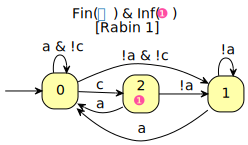

In [4]:
(Sx,betax_s,Tx_sas,Lx_s,JKlist, MECs,acceptingMECs, BX,CX, DRAinfo) = productMDP_fromLTL(ltl2drafolder,SPOTbinfolder, betas,T,Ls, LTLstr, HOAfile, False)
display(DRAinfo['SPOTaut'])

# Currently, the LP needs an initial state - derive this from beta
betax_s_positive = [s for s, prob in betax_s.items() if prob > 0]
assert len(betax_s_positive) == 1
init_sx = betax_s_positive[0]


In [5]:
numNodes = len(list(DRAinfo.values())[1])

pi, z, x_sqa, x_s, w, f, indicator, solutionstatus, buildtime, solvetime = qcpex1_new(S,numNodes, init_sx, T, Sx, Tx_sas, R_sas, MECs, acceptingMECs, BX, CX, SSconstraints, JKlist, epsilon = 1e-6)
#pi, z, x_sqa, x_s, w, f, indicator, solutionstatus, buildtime, solvetime = qcpex1(S, init_sx, T, Sx, Tx_sas, R_sas, MECs, acceptingMECs, BX, CX, SSconstraints, JKlist, epsilon = 1e-6)

print('Build time: {0}'.format(buildtime))
print('Solve time: {0}'.format(solvetime))

numStates = len(S)

Current Time = 12:18:23
Done building model!!! It took 0.028432846069335938 seconds!
test test test test for the jupyter
Version identifier: 12.10.0.0 | 2019-11-26 | 843d4de
CPXPARAM_Read_DataCheck                          1
CPXPARAM_Simplex_Tolerances_Optimality           1.0000000000000001e-09
CPXPARAM_Simplex_Tolerances_Feasibility          1.0000000000000001e-09
CPXPARAM_MIP_Tolerances_Integrality              1e-08
Tried aggregator 1 time.
MIP Presolve eliminated 656 rows and 265 columns.
MIP Presolve modified 49 coefficients.
Reduced MIP has 119 rows, 99 columns, and 394 nonzeros.
Reduced MIP has 35 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.01 sec. (0.71 ticks)
Found incumbent of value 0.000000 after 0.01 sec. (0.98 ticks)

Root node processing (before b&c):
  Real time             =    0.01 sec. (1.00 ticks)
Parallel b&c, 8 threads:
  Real time             =    0.00 sec. (0.00 ticks)
  Sync time (average)   =    0.00 sec.
  Wait time (average)   =    0.00

In [6]:

print(pi)


pi_sa = [[0 for j in range(4)] for i in range(len(S))]


print(pi_sa)

#print(As)

for s in S:
    for a in range(4):
        print(s,a)
        pi_sa[s][a] = pi[s, a]
#print(pi_sa)

pi_arrows = ['<', 'v', '>', '^']

gridsize = (len(stategrid), len(stategrid[0]))
pi_mat = [[' ' for j in range(gridsize[1])] for i in range(gridsize[0])]
for i in range(gridsize[0]):
    for j in range(gridsize[1]):
        s = stategrid[i][j]
        pi_pos = [i for i,val in enumerate(pi_sa[s]) if val > 0]
        assert len(pi_pos) <= 1
        if pi_pos:
            pi_mat[i][j] = pi_arrows[pi_pos[0]]

for i in range(gridsize[0]):
    for j in range(gridsize[1]):
        print(pi_mat[i][j], end='')
    print('')

for i in range(gridsize[0]):
    for j in range(gridsize[1]):
        print("{0:3d}".format(stategrid[i][j]), end='')
    print('')

{(1, 3): -0.0, (3, 0): 1.0, (2, 1): -0.0, (6, 2): -0.0, (5, 1): -0.0, (0, 3): -0.0, (4, 0): 1.0, (1, 2): -0.0, (3, 3): -0.0, (6, 3): 1.0, (5, 0): 1.0, (2, 2): 1.0, (4, 1): -0.0, (1, 1): 1.0, (3, 2): -0.0, (0, 0): 1.0, (6, 0): -0.0, (2, 3): -0.0, (4, 2): -0.0, (1, 0): -0.0, (5, 3): -0.0, (0, 1): -0.0, (6, 1): -0.0, (3, 1): -0.0, (2, 0): -0.0, (4, 3): -0.0, (5, 2): -0.0, (0, 2): -0.0}
[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
0 0
0 1
0 2
0 3
1 0
1 1
1 2
1 3
2 0
2 1
2 2
2 3
3 0
3 1
3 2
3 3
4 0
4 1
4 2
4 3
5 0
5 1
5 2
5 3
6 0
6 1
6 2
6 3
<v
><
  0  1
  2  3


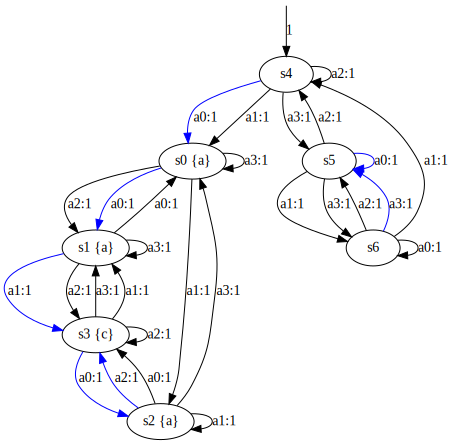

In [6]:
display( makedotMDP(betas,T,Ls, frozenset(), pi, True) )


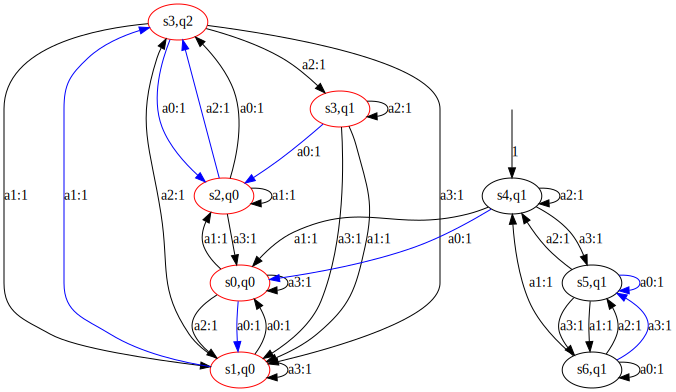

In [7]:
display( makedotMDP(betax_s,Tx_sas,Lx_s, acceptingMECs, pi, False) )

In [8]:
## ISMAIL TESTING WHETHER X_sa = sum_q x_sqa, Alvaro request 7/4/2020

## double check the action space from Tsas

### get the type of sqa_list

### pull up x_sa from qcpex1

#print('X_s = ' , x_s)


# get x_sa = x_s .* pi(s,a)

# x_sa = {}

# SA = {(s, a) for (s, a, s2) in T}  # S X A
# As = {s: {a for (s2, a) in SA if s2 == s} for s in S}
# Qs = {s: {q for (s2, q) in Sx if s2 == s} for s in S}


# #### getting x_sa
# for s in S:
#     for a in As[s]:
#         #print('do nada')
#         x_sa[(s,a)] = x_s[s]*pi_sa[s][a]
        
# #print('x_sqa' , x_sqa)
# #print('x_sa = ' , x_sa)


# #### getting \sum_q (x_sqa)

# x_sa_from_sum_q = {}
# for s in S:
#     for a in As[s]:
#         x_sa_from_sum_q[(s,a)] = sum([x_sqa[(s, q), a] for q in Qs[s]])
        

# print("x_sa = ")
# for s in S: 
#     for a in As[s]: 
#         #print()
#         print('state, action = ',s,',',a,' prob = ' ,x_sa[(s, a)]) 
          
#     print() 

        

# print("x_sa_from_sum_q = ")
# for s in S: 
#     for a in As[s]: 
#         #print()
#         print('state, action = ',s,',',a,' prob = ' ,x_sa_from_sum_q[(s, a)]) 
          
#     print() 

# #import pandas as pd
# #df = pd.DataFrame(x_sa_from_sum_q)
# print(T)

NameError: name 'c' is not defined